### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [3]:
data.head(10) # look over data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.tail(10) # bottom

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [283]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info() # field Info, lots of data in objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isnull().sum() / data.shape[0] * 100 # check for nulls (as a percent)

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

3. Decide what to do about your missing data -- drop, replace, other...

In [177]:
data[data['Bar'].isnull()].sample(5)
data[data['CoffeeHouse'].isnull()].sample(5)
data[data['CarryAway'].isnull()].sample(5)
data[data['RestaurantLessThan20'].isnull()].sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8964,No Urgent Place,Kid(s),Sunny,80,10PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,0,0,1,1
8970,Home,Alone,Rainy,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,NaN,4~8,1,1,1,0,1,0
3529,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,NaN,less1,1,0,0,0,1,1
904,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,1,0,0,1,1
923,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,31,Unmarried partner,...,never,4~8,NaN,never,1,1,0,0,1,1


Seems like replacing empty values (Nan) in Bar, CoffeeHouse, RestaurantLessThan20 and Restaurant20To50 with, never will be a good way to save, the rest of data in those fields. Well just assume if it was blank it is never.

In [181]:
df = data.copy() # make a copy
df.drop(['car'], axis=1, inplace=True) # remove car column
df['Bar'].fillna(value="never", inplace=True) # fill in gaps with never
df['CoffeeHouse'].fillna(value="never", inplace=True) # fill in gaps with never
df['CarryAway'].fillna(value="never", inplace=True) # fill in gaps with never
df['RestaurantLessThan20'].fillna(value="never", inplace=True) # fill in gaps with never
df['Restaurant20To50'].fillna(value="never", inplace=True) # fill in gaps with never
df.rename(columns={'passanger': 'passenger'}, inplace=True) # corret passanger spelling

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

df.info() shows already remaining columns at 12684, So didn't loose anything but the car column, but we are assuming a bit, with replacement of NaN to 'never'.

In [282]:
df.coupon.value_counts() # looking at object fields                  

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [132]:
df.occupation.value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [133]:
df.income.value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [134]:
df.age.value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [140]:
df.Bar.value_counts() #

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [135]:
df.has_children.value_counts() # strange nobody has more than one kid?   

0    7431
1    5253
Name: has_children, dtype: int64

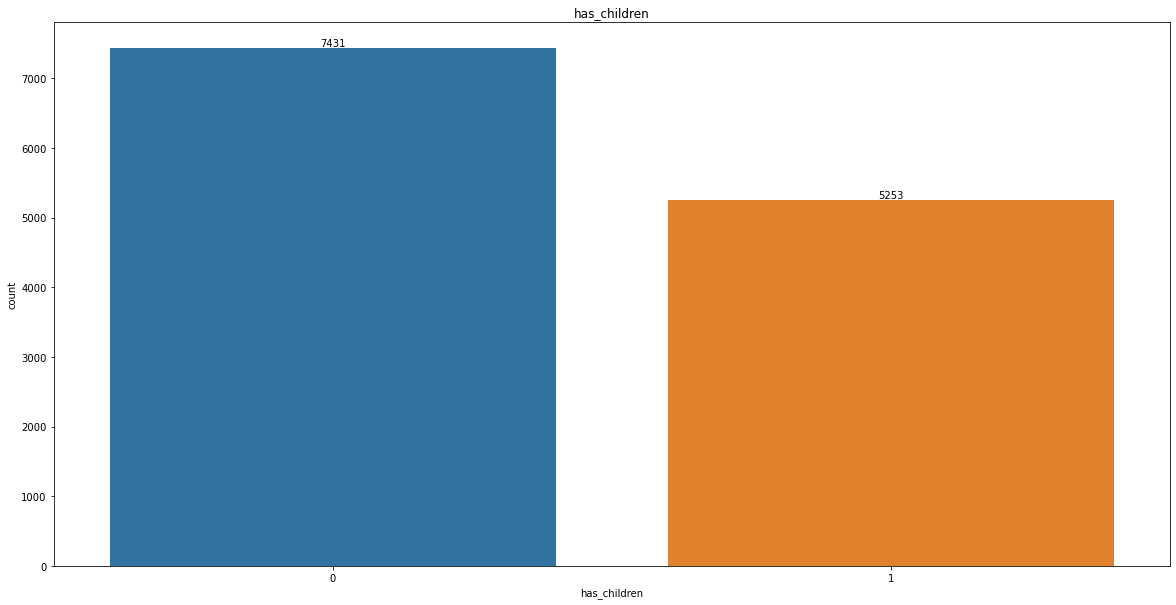

In [136]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df['has_children'], data = df)
labels = ax.bar_label(ax.containers[0])
plt.title('has_children')
plt.show()

In [176]:
df.sample(10) # random sample to look over the data

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12228,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Female,21,Married partner,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
6192,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,31,Unmarried partner,...,1~3,4~8,1~3,less1,1,0,0,0,1,1
3650,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,31,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
10357,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,21,Single,...,4~8,less1,never,never,1,0,0,0,1,1
2267,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,never,1~3,less1,never,1,1,0,0,1,1
1702,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,26,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,1
1842,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,41,Single,...,1~3,1~3,less1,never,1,1,0,0,1,1
10840,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,21,Single,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
2465,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,less1,1~3,1~3,less1,1,0,0,1,0,1
3364,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,never,4~8,1~3,never,1,0,0,0,1,1


4. What proportion of the total observations chose to accept the coupon? 



In [141]:
df['Y'].value_counts(normalize=True).loc[1]*100

56.84326710816777

56.84% of total observations accepted the coupon.

5. Use a bar plot to visualize the `coupon` column.

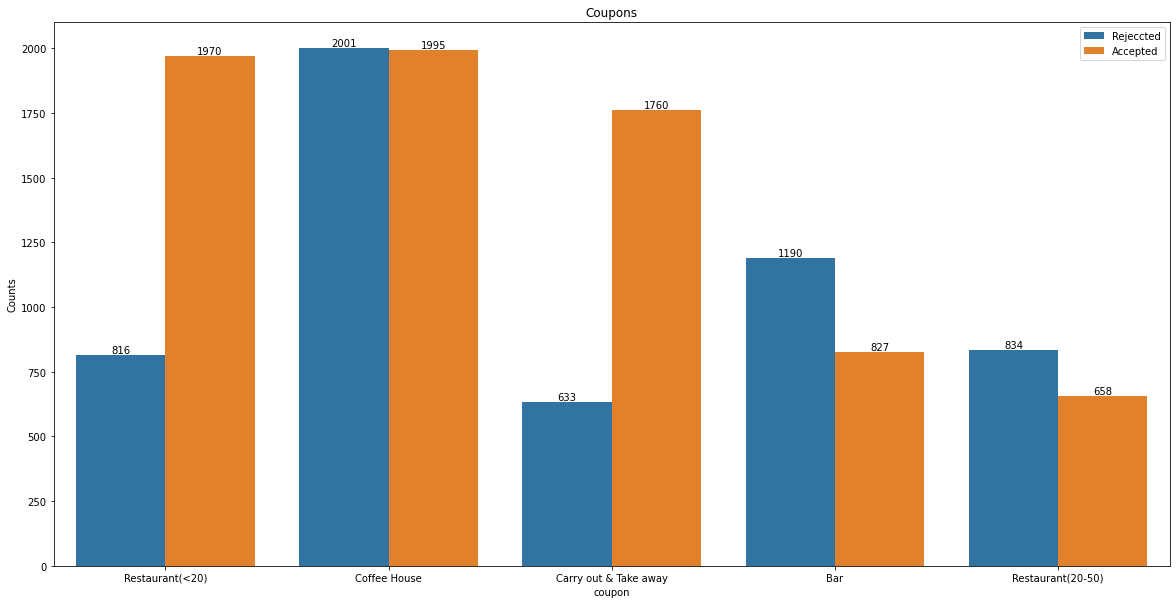

In [212]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = df['coupon'], data = df, hue="Y")
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel('Counts')
plt.title('Coupons')
ax.legend(['Rejeccted', 'Accepted'])
plt.show()


In [281]:
 df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

6. Use a histogram to visualize the temperature column.

In [60]:
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

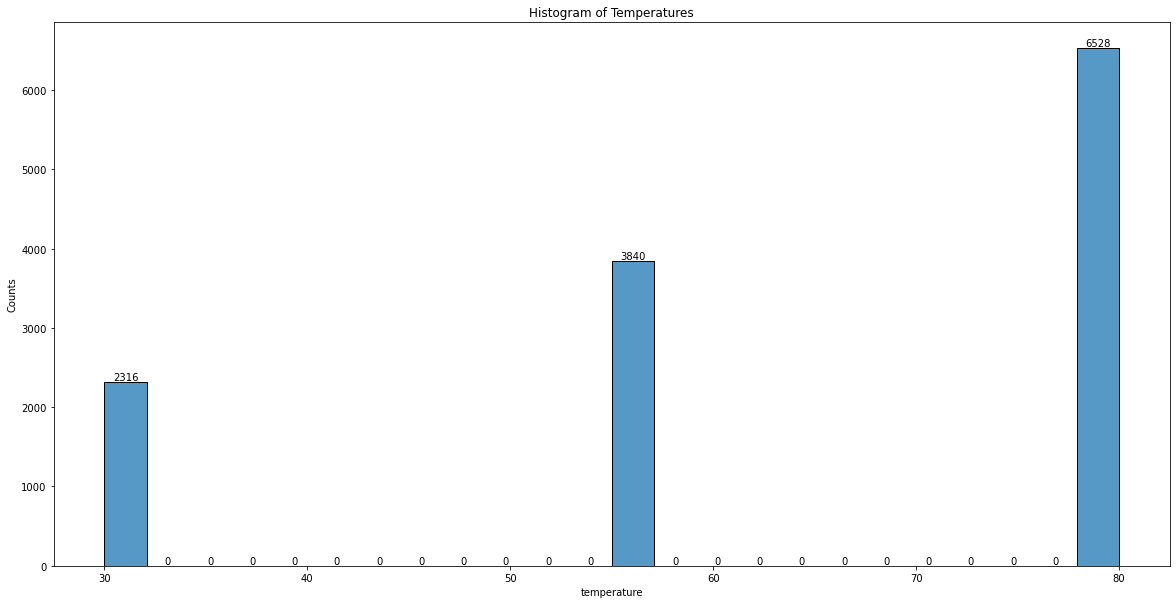

In [280]:
plt.figure(figsize=(20,10))
ax = sns.histplot(x = data['temperature'], data = data)
labels = ax.bar_label(ax.containers[0])
ax.set_ylabel('Counts')
plt.title('Histogram of Temperatures')
plt.show()

The weather is very strange wherever they did this, only having three temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [194]:
df_bar = df.loc[df['coupon']=="Bar"]

2. What proportion of bar coupons were accepted?


In [195]:
acceptance = df_bar.Y.value_counts(normalize=True)*100
acccptance_series = pd.Series([acceptance[0],acceptance[1]])
index_accept = pd.Series(['Rejected','Accepted'])

In [278]:
print(acccptance_series,index_accept)

0    58.998513
1    41.001487
dtype: float64 0    Rejected
1    Accepted
dtype: object


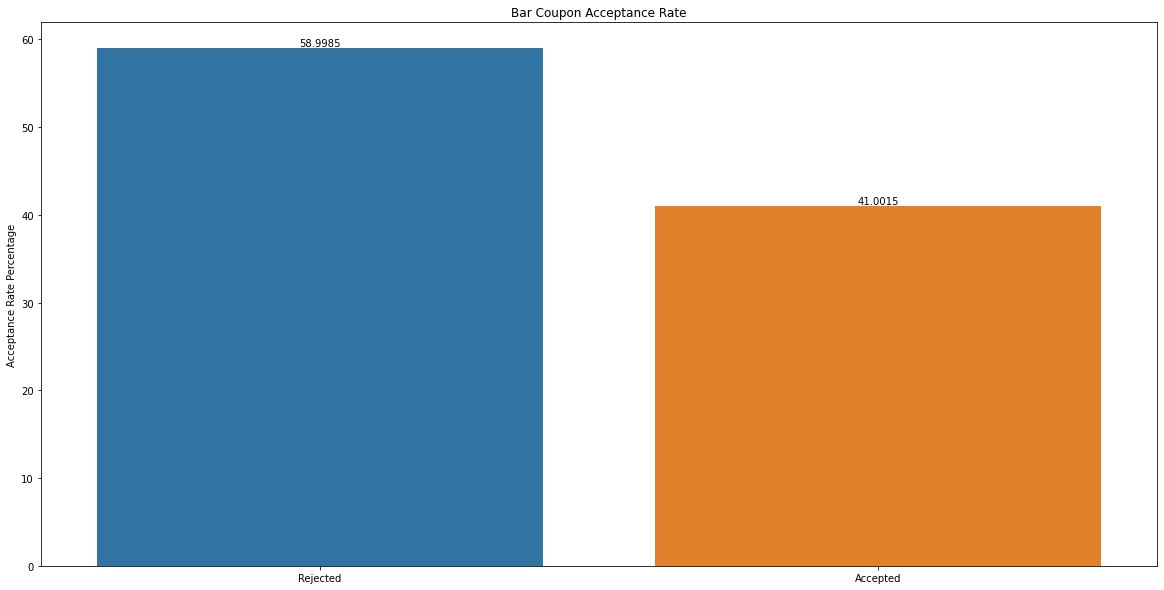

In [213]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_accept, y=acccptance_series, data=acccptance_series)
ax.set_ylabel('Acceptance Rate Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Bar Coupon Acceptance Rate')
plt.show()

41% percent of the coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [270]:
# bars <= 3 vs bars > 3
qu_2a = df_bar.query("Bar == '1~3'")['Y'].value_counts(normalize=True).loc[1]*100
qu_2b = df_bar.query("(Bar == '4~8' or Bar == 'gt8')")['Y'].value_counts(normalize=True).loc[1]*100
acceptance_rate_compared_3 = pd.Series([qu_2a,qu_2b])
index_compared_3 = pd.Series(['Bar visits<=3','Bar visits>3'])

In [277]:
print(acceptance_rate_compared_3,index_compared_3)

0    64.735516
1    76.884422
dtype: float64 0    Bar visits<=3
1     Bar visits>3
dtype: object


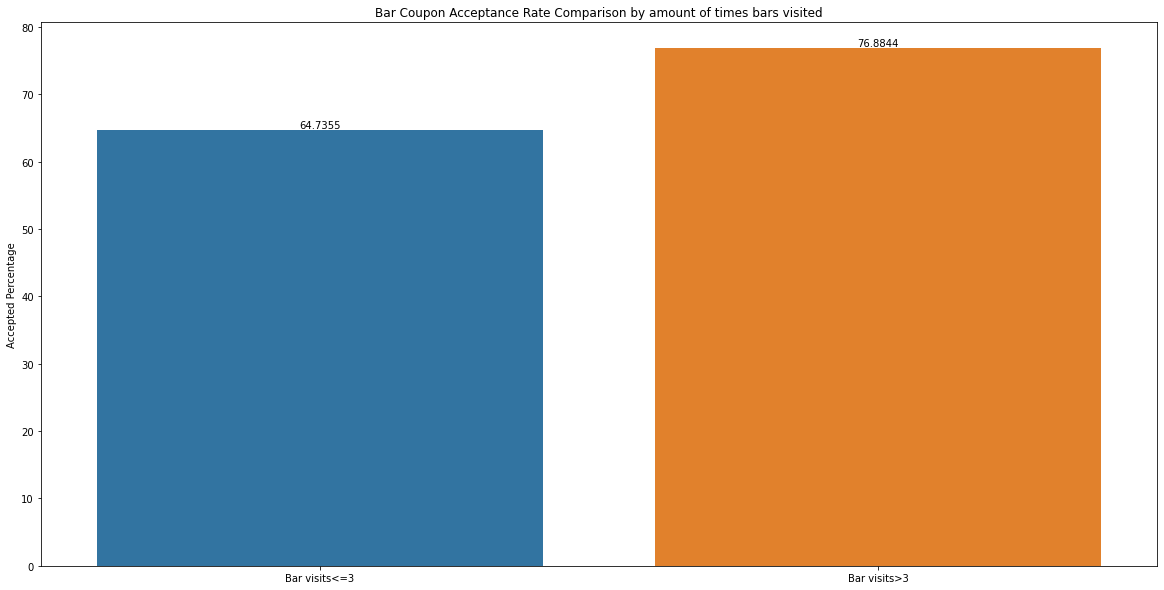

In [271]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_compared_3, y=acceptance_rate_compared_3, data=acceptance_rate_compared_3)
ax.set_ylabel('Accepted Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Bar Coupon Acceptance Rate Comparison by amount of times bars visited')
plt.show()

People who go to the bar more often (visits>3) will accept the bar coupons more often 76.88% vs 64.74%.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [272]:
# bars vists > 1, age > 25
qu = df_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age=='26' or age=='31' or age=='36' or age=='41' or age=='46' or age=='50plus')")['Y'].value_counts(normalize=True).loc[1]*100
not_qu = df_bar.query("not ((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age=='26' or age=='31' or age=='36' or age=='41' or age=='46' or age=='50plus'))")['Y'].value_counts(normalize=True).loc[1]*100
acceptance_rate_compared = pd.Series([qu,not_qu])
index_compared = pd.Series(['Bar visits>1 Age>25','All Others'])

In [276]:
print(acceptance_rate_compared,index_compared)

0    69.523810
1    33.500313
dtype: float64 0    Bar visits>1 Age>25
1             All Others
dtype: object


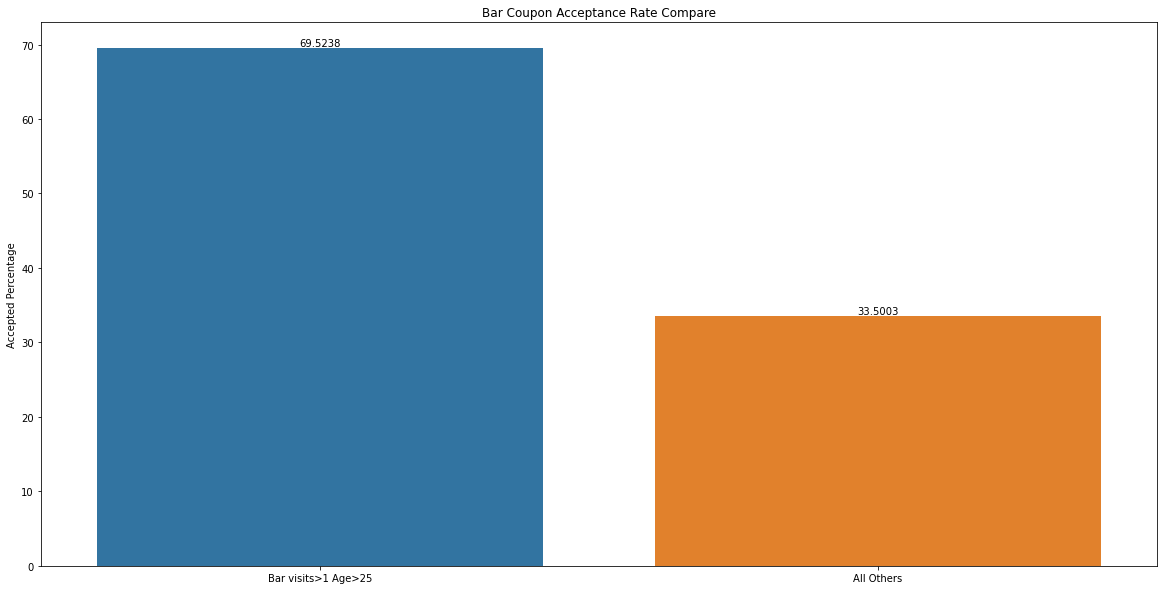

In [273]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_compared, y=acceptance_rate_compared, data=acceptance_rate_compared)
labels = ax.bar_label(ax.containers[0])
ax.set_ylabel('Accepted Percentage')
plt.title('Bar Coupon Acceptance Rate Compare')
plt.show()

There is a big difference 69.52% vs 33.5% more than 2X, to older bar going group. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


We are going to assume the question above is: Compare the acceptance rate between  
The first group is one where all three listed conditions are true:
go to bars more than once a month
had passengers that were not a kid
had occupations not farming, fishing & forestry
The second group is everyone else.

In [274]:
# bars > 1, no kid passengers and not in farming, fishing or forestry
qu_5=df_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passenger !='Kid(s)') and (occupation !='Farming Fishing & Forestry')")['Y'].value_counts(normalize=True).loc[1]*100
not_qu_5=df_bar.query("not ((Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passenger !='Kid(s)') and (occupation !='Farming Fishing & Forestry'))")['Y'].value_counts(normalize=True).loc[1]*100
acceptance_rate_compared_5 = pd.Series([qu_5,not_qu_5])
index_compared_5 = pd.Series(['Bar visits>1 No Kids Passengers and Job is not farm/fish/forest','Everyone Else'])

In [275]:
print(acceptance_rate_compared_5,index_compared_5)

0    71.324864
1    29.604366
dtype: float64 0    Bar visits>1 No Kids Passengers and Job is not...
1                                        Everyone Else
dtype: object


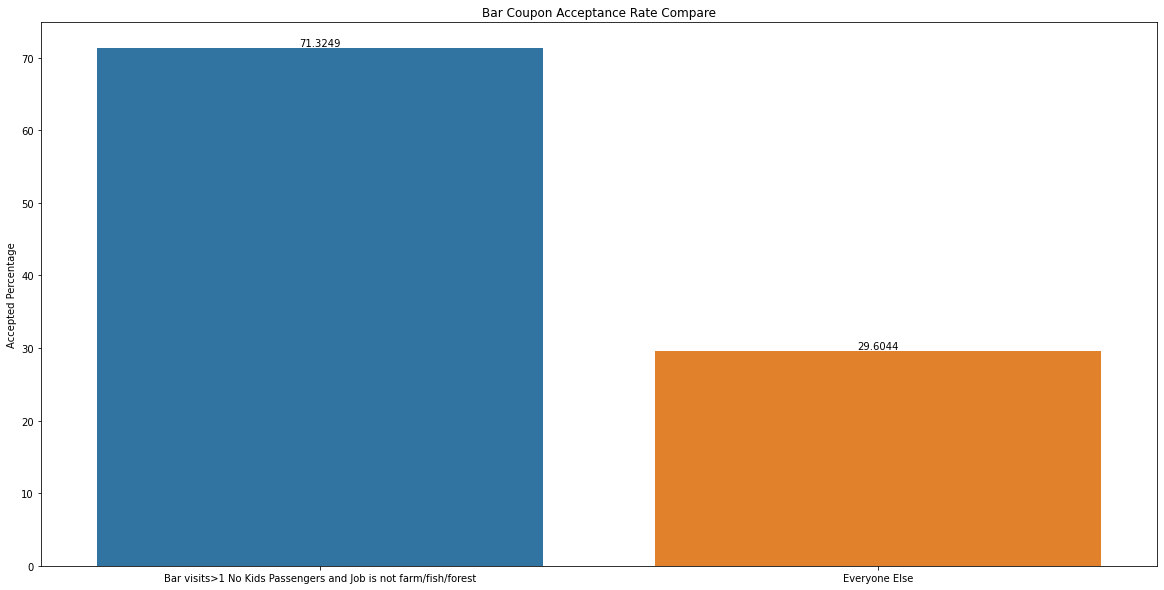

In [237]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_compared_5, y=acceptance_rate_compared_5, data=acceptance_rate_compared_5)
ax.set_ylabel('Accepted Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Bar Coupon Acceptance Rate Compare')
plt.show()

Going to the bar more has more influence on if a customer will accept a coupon, 71.32% vs 29.6%.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [215]:
# bars > 1, passenger != kids && passenger != Alone
qu_a_6 = df_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passenger !='Kid(s)' and passenger !='Alone') and (maritalStatus !='Widowed') ")['Y'].value_counts(normalize=True).loc[1]*100

# Bar > 1 and age == "21" or age == "26" or age = "below21"
qu_b_6 = df_bar.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (age =='21' or age =='26' or age =='below21')")['Y'].value_counts(normalize=True).loc[1]*100

# RestaurantLessThan20 > 4 and income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999"
qu_c_6 = df_bar.query("(RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income =='Less than $12500' or income =='$12500 - $24999' or income =='$25000 - $37499' or income =='$37500 - $49999')")['Y'].value_counts(normalize=True).loc[1]*100

acceptance_rate_compared_6 = pd.Series([qu_a_6, qu_b_6, qu_c_6])
index_compared_6 = pd.Series(['Bar visits>1 and No Kid Passengers and Not Windowed','Bar visits>1 and Age<30','Cheap restaurant visits>=4  and Income<50K'])

In [216]:
print(acceptance_rate_compared_6,index_compared_6)

0    71.794872
1    72.173913
2    45.348837
dtype: float64 0    Bar visits>1 and No Kid Passengers and Not Win...
1                              Bar visits>1 and Age<30
2           Cheap restaurant visits>=4  and Income<50K
dtype: object


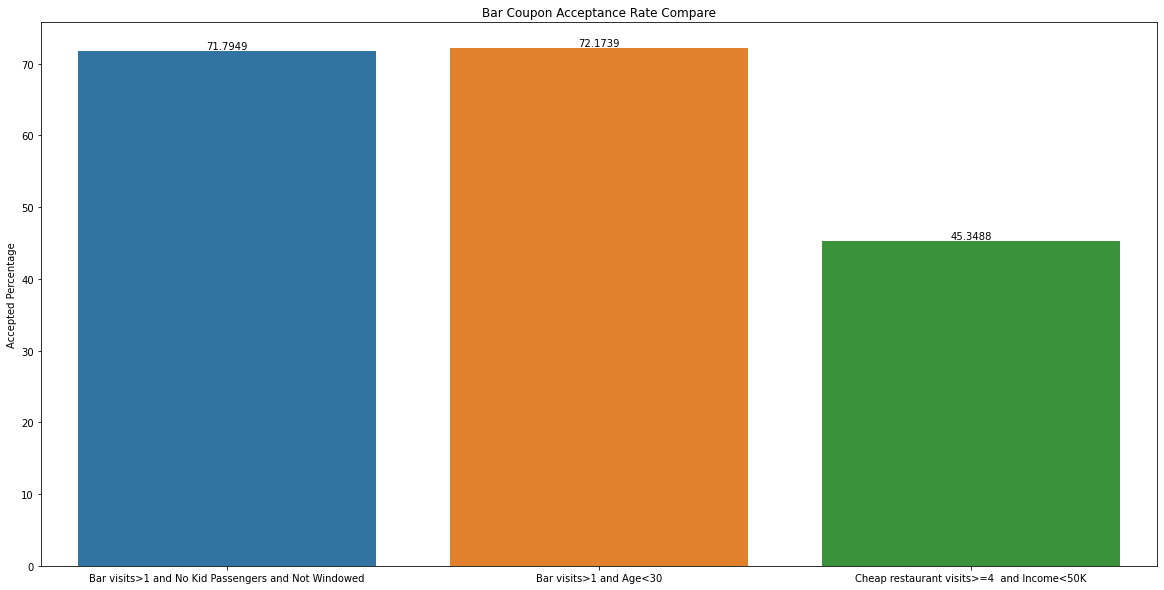

In [217]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_compared_6, y=acceptance_rate_compared_6, data=acceptance_rate_compared_6)
ax.set_ylabel('Accepted Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Bar Coupon Acceptance Rate Compare')
plt.show()

Seems like people who go to bars more, will accept and use the coupons more and less often if they make less income. 71.79% vs 72.17% vs 45.35%

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Customer that tend to already go to bars more will accept more coupons (for bars), than those who go to bars less.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [240]:
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [241]:
df_cheap_rest = df.loc[df['coupon']=="Restaurant(<20)"]

In [243]:
acceptance_cr = df_cheap_rest.Y.value_counts(normalize=True)*100
acccptance_series_cr = pd.Series([acceptance_cr[0],acceptance_cr[1]])
index_accept_cr = pd.Series(['Rejected','Accepted'])

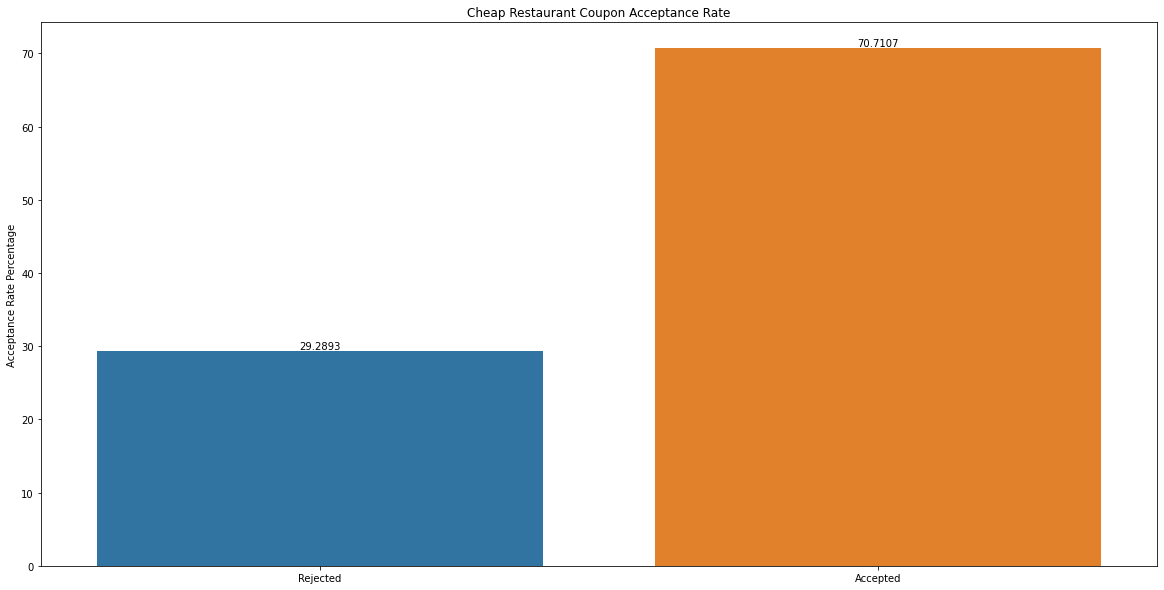

In [244]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_accept_cr, y=acccptance_series_cr, data=acccptance_series_cr)
ax.set_ylabel('Acceptance Rate Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Cheap Restaurant Coupon Acceptance Rate')
plt.show()

1. What proportion of cheap restaurant coupons were accepted?

71.32% percent of the coupons were accepted.

In [263]:
# bars > 1, passenger != kids && passenger != Alone
qu_a_cr = df_cheap_rest.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passenger !='Kid(s)' and passenger !='Alone') and (maritalStatus !='Widowed') ")['Y'].value_counts(normalize=True).loc[1]*100

# Bar > 1 and age == "21" or age == "26" or age = "below21"
qu_b_cr = df_cheap_rest.query("(Bar == '1~3' or Bar == '4~8' or Bar == 'gt8') and (passenger !='Alone')")['Y'].value_counts(normalize=True).loc[1]*100

# RestaurantLessThan20 > 4 and income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999"
qu_c_cr = df_cheap_rest.query("(RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8') and (income =='Less than $12500' or income =='$12500 - $24999' or income =='$25000 - $37499' or income =='$37500 - $49999')")['Y'].value_counts(normalize=True).loc[1]*100

acceptance_rate_compared_cr = pd.Series([qu_a_cr, qu_b_cr, qu_c_cr])
index_compared_cr = pd.Series(['Bar visits>1 and No Kid Passengers and Not Windowed','Bar visits>1 and has a Passenger','Cheap restaurant visits>=4  and Income<50K'])

In [264]:
print(acceptance_rate_compared_cr,index_compared_cr)

0    81.741573
1    81.490385
2    71.089109
dtype: float64 0    Bar visits>1 and No Kid Passengers and Not Win...
1                     Bar visits>1 and has a Passenger
2           Cheap restaurant visits>=4  and Income<50K
dtype: object


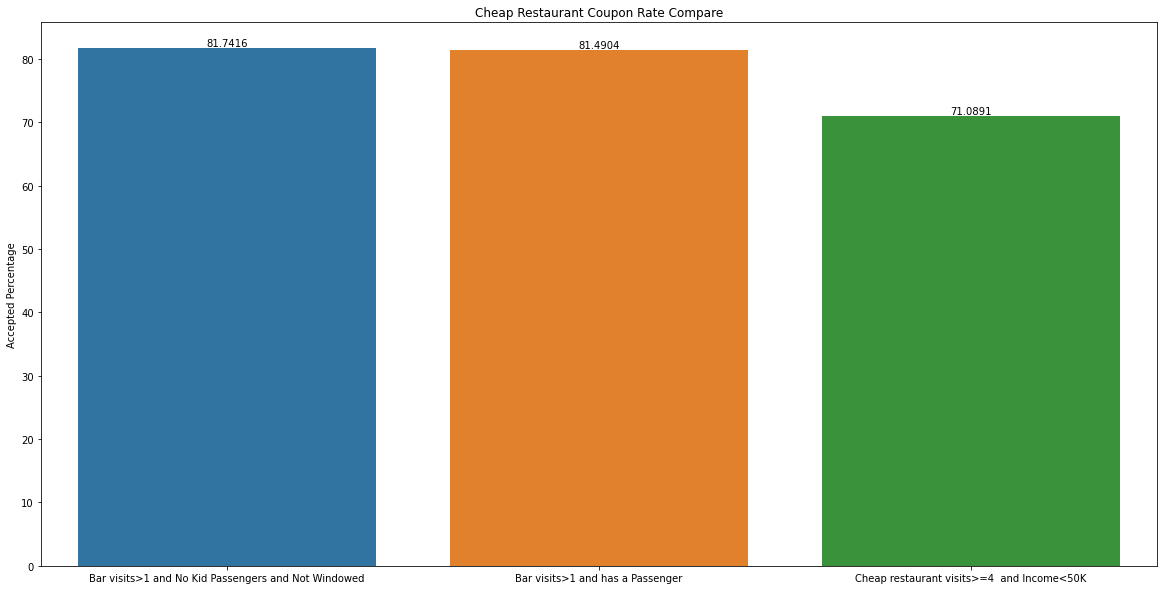

In [265]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=index_compared_cr, y=acceptance_rate_compared_cr, data=acceptance_rate_compared_cr)
ax.set_ylabel('Accepted Percentage')
labels = ax.bar_label(ax.containers[0])
plt.title('Cheap Restaurant Coupon Rate Compare')
plt.show()

2. What appears to influence to accept the coupon the most?

Strangely bar visits, lack of kid passengers, being not windowed has the highest cheap reastaurant coupon acceptance rate. 81.74% vs 81.49% vs 71.09%

Future exploration: converting fields to numerics to allow for more correlation, would help a lot in seeing how things relate.